1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats.stats import ttest_ind
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine2)

# no need for an open connection, 
# as we're only doing a single query
engine2.dispose()

In [2]:
# need to remove these vals for boxcox
df[df['math score'] <= 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [6]:
# remove 0 math score
df2 = df[df['math score'] != 0]

## 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

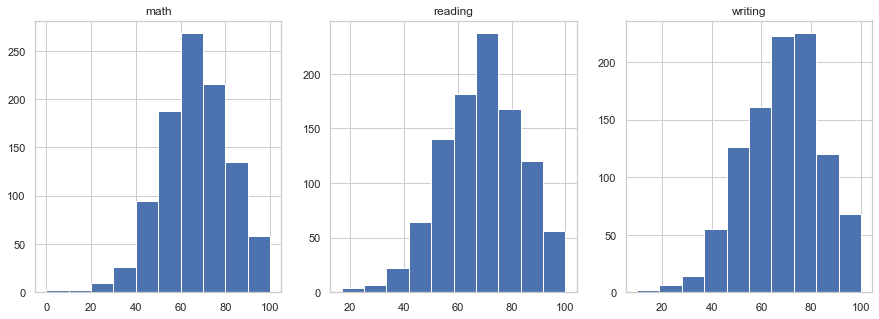

In [7]:
plt.subplots(figsize=(15,5))

plt.subplot(131)
plt.hist(df['math score'])
plt.title('math')

plt.subplot(132)
plt.hist(df['reading score'])
plt.title('reading')

plt.subplot(133)
plt.hist(df['writing score'])
plt.title('writing')

plt.show()

In [8]:
jb_stats = jarque_bera(df["math score"])
norm_stats = normaltest(df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["reading score"])
norm_stats = normaltest(df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df["writing score"])
norm_stats = normaltest(df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


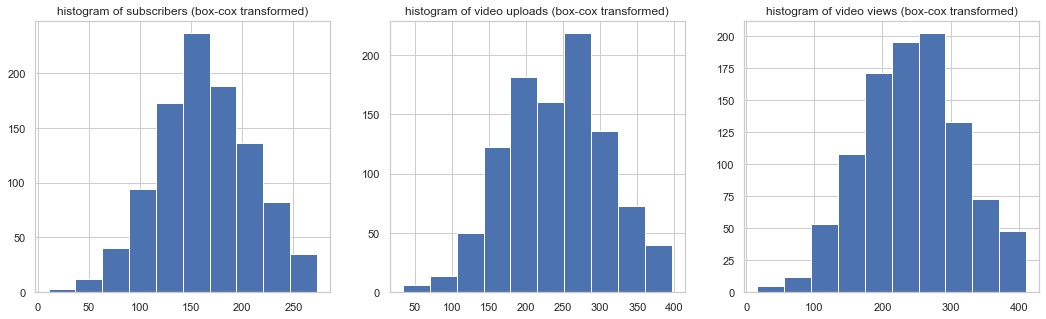

In [11]:
math_score_boxcox,_ = boxcox(df2["math score"])
reading_score_boxcox,_ = boxcox(df["reading score"])
writing_score_boxcox,_ = boxcox(df["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(131)
plt.hist(math_score_boxcox)
plt.title("histogram of subscribers (box-cox transformed)")

plt.subplot(132)
plt.hist(reading_score_boxcox)
plt.title("histogram of video uploads (box-cox transformed)")

plt.subplot(133)
plt.hist(writing_score_boxcox)
plt.title("histogram of video views (box-cox transformed)")

plt.show()

In [13]:
jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559665 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


#### Yes, they are now closer to being normal.

## 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [8]:
df['avg score'] = (df["math score"] + df["reading score"] + df["writing score"]) / 3

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


(array([  5.,  12.,  21.,  81., 154., 193., 227., 172.,  98.,  36.]),
 array([ 18.33333333,  26.5       ,  34.66666667,  42.83333333,
         51.        ,  59.16666667,  67.33333333,  75.5       ,
         83.66666667,  91.83333333, 100.        ]),
 <a list of 10 Patch objects>)

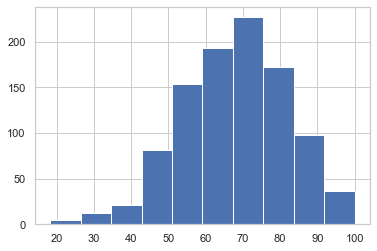

In [10]:
plt.hist(df['avg score'])

In [11]:
jb_stats = jarque_bera(df["avg score"])
norm_stats = normaltest(df["avg score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 10.345394363749879 and p value is 0.0056692571616785425
Normality test statistics is 10.127189207749474 and p value is 0.006322790687068094


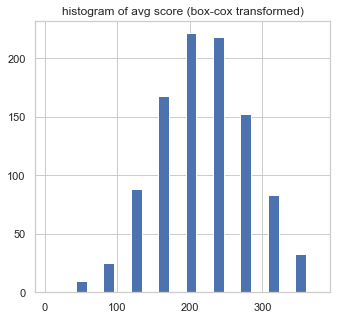

In [12]:
math_score_boxcox = boxcox(df["avg score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(131)
plt.hist(math_score_boxcox)
plt.title("histogram of avg score (box-cox transformed)")

plt.show()

In [13]:
jb_stats = jarque_bera(df["avg score"])
norm_stats = normaltest(df["avg score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 10.345394363749879 and p value is 0.0056692571616785425
Normality test statistics is 10.127189207749474 and p value is 0.006322790687068094


## 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


#### Every other variable could be useful.